In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [43]:
#Get the data
df = web.DataReader('USDTRY=X', data_source='yahoo', start='2010-01-01', end='2020-05-13')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1.49760,1.47080,1.49720,1.47310,0.0,1.47310
2010-01-05,1.47770,1.46450,1.47330,1.47270,0.0,1.47270
2010-01-06,1.48010,1.46990,1.47250,1.47140,0.0,1.47140
2010-01-07,1.48130,1.46880,1.47150,1.47150,0.0,1.47150
2010-01-08,1.47310,1.45600,1.47160,1.45800,0.0,1.45800
...,...,...,...,...,...,...
2020-05-06,7.26682,7.07557,7.19672,7.19708,0.0,7.19708
2020-05-07,7.16700,7.07586,7.09350,7.08830,0.0,7.08830
2020-05-10,7.10340,7.05954,7.08320,7.09400,0.0,7.09400


In [44]:
#Get the number of rows and columns in the dataset
df.shape

(2698, 6)

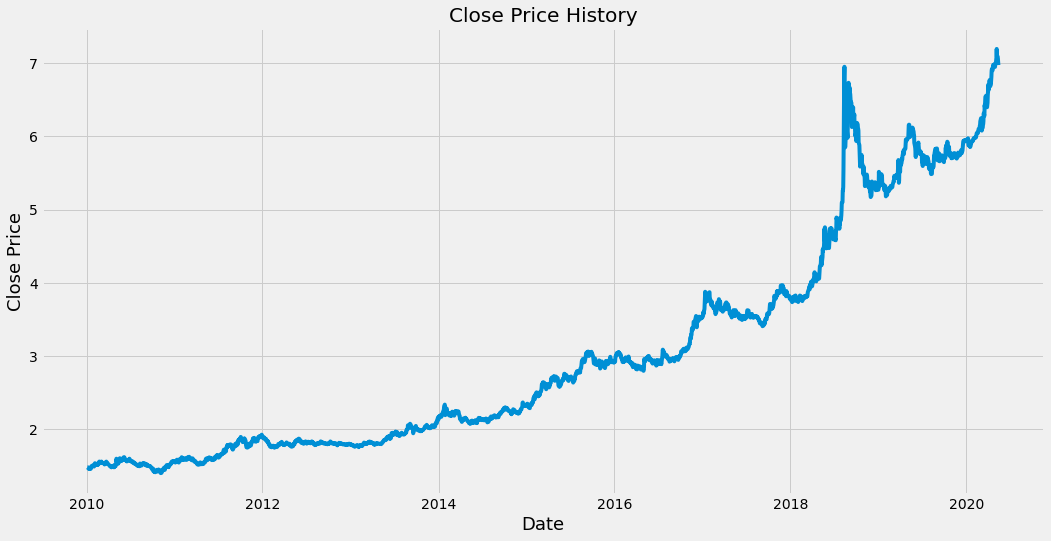

In [45]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [46]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2159

In [47]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01381762],
       [0.01374871],
       [0.01352474],
       ...,
       [0.98224034],
       [0.97696826],
       [0.96201014]])

In [48]:
#Create the training dataset
#Create the scaled train dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01381762, 0.01374871, 0.01352474, 0.01354197, 0.01121605,
       0.00987219, 0.01044076, 0.01011339, 0.01068196, 0.01087147,
       0.00990665, 0.01078533, 0.01369702, 0.01602294, 0.01647089,
       0.01605739, 0.01676379, 0.01821102, 0.01791812, 0.01779751,
       0.0154027 , 0.01614355, 0.01705667, 0.02205308, 0.02322463,
       0.02227705, 0.01965824, 0.02107103, 0.02034741, 0.02089873,
       0.02115716, 0.01936536, 0.02041632, 0.02282838, 0.02038186,
       0.02343139, 0.02717008, 0.02654984, 0.02644645, 0.02641201,
       0.02460295, 0.02429284, 0.02480971, 0.02720453, 0.02477525,
       0.02374151, 0.02410331, 0.02393104, 0.0237932 , 0.02310403,
       0.02298343, 0.02193247, 0.02034741, 0.02289729, 0.02437898,
       0.02475802, 0.02482693, 0.02710116, 0.02584344, 0.02446512])]
[0.023121263221058258]

[array([0.01381762, 0.01374871, 0.01352474, 0.01354197, 0.01121605,
       0.00987219, 0.01044076, 0.01011339, 0.01068196, 0.01087147,
       0.00990665, 0.01078533, 0.0

In [0]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2099, 60, 1)

In [0]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the module
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2099/2099 [==============================] - 77s 37ms/step - loss: 2.2535e-04


In [0]:
#Create the testing dataset
#Create a new array containing scaled vlaues from index 2099 to 2698
test_data = scaled_data[training_data_len - 60:,:]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:] #actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [66]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

0.23214952180469633

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


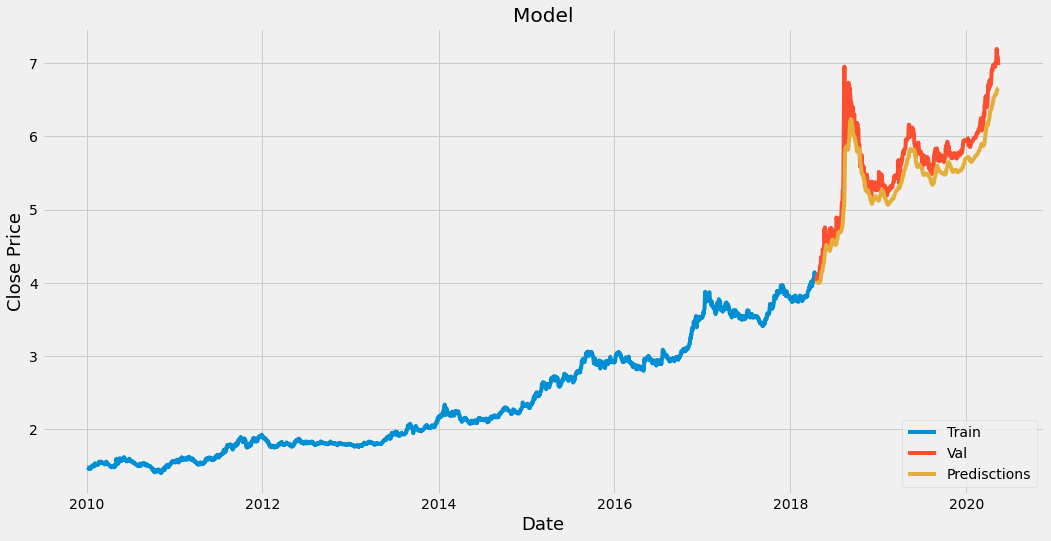

In [69]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [0]:
#Blue : Trained data
#Red : Actual graph
#Yellow: Prediction

In [71]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-04-18,4.01700,4.016564
2018-04-19,4.04582,4.010355
2018-04-22,4.07850,4.002943
2018-04-23,4.10770,3.999158
2018-04-24,4.08648,4.000693
...,...,...
2020-05-06,7.19708,6.603503
2020-05-07,7.08830,6.629611
2020-05-10,7.09400,6.646763


In [76]:
#Get the quote
usd_quote = web.DataReader('USDTRY=X', data_source='yahoo', start='2010-01-01', end='2020-05-14')
#Create a new dataframe
new_df = usd_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the pas t60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data as 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[6.656268]]


In [0]:
#Today is 2020-05-13 and that's prediction for 2020-05-14